In [61]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
from skimage.feature import hog

#### Loading dataset

In [62]:
cars_dir = [car for car in glob.glob("../dataset/vehicles/*/*.png",recursive=True)]
non_car_dir = [non_car for non_car in glob.glob("../dataset/non-vehicles/*/*.png",recursive=True)]
print("Cars loaded: {} Non cars loaded: {}".format(len(cars_dir),len(non_car_dir)))

Cars loaded: 8792 Non cars loaded: 8968


#### Feature Extraction 

In [63]:
def bin_spatial(img, size=(32, 32)):
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(img, size).ravel() 
    # Return the feature vector
#     print(features.shape)
    return features

def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
#     Seems like a useless step each channel for all images return same result
#     plt.hist(channel1_hist,bins=32,range=(0,256))
#     plt.hist(channel2_hist,bins=32,range=(0,256))
#     plt.hist(channel3_hist,bins=32,range=(0,256))
#     print(hist_features.shape)
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

# Return HOG features and visualization
# Hog takes only gray images
def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, 
                                  visualize=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, 
                       visualize=vis, feature_vector=feature_vec)
        return features


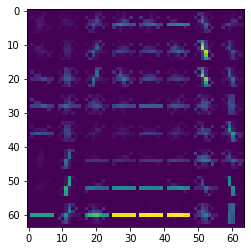

In [67]:
car_test = plt.imread(cars_dir[5])
new_img = cv2.cvtColor(car_test, cv2.COLOR_RGB2YCrCb)
features,hog_image = get_hog_features(new_img[:,:,0], 9, 8, 2,True,True) #Block is 2x2 cell, cell is 8x8 pixels
plt.imshow(hog_image)
